In [67]:
import pandas as pd
import sqlite3 as sql

In [68]:
# create df
election_df = pd.read_csv('elections.csv')

# create db
conn = sql.connect('elections.db')

In [69]:
election_df.head(4)

,Unnamed: 0,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,mp_firstname,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2019-12-13 02:30:00,Stephen,...,450,0,2711,0,0,0,0,0,731,0
1,1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2019-12-13 03:09:00,Robin,...,0,0,2704,0,0,0,0,0,0,0
2,2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2019-12-13 03:13:00,Kirsty,...,880,20205,0,0,0,0,0,0,0,0
3,3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2019-12-13 03:34:00,Stephen,...,0,20388,0,0,0,0,0,0,0,0


In [70]:
# Select all from database
query = "SELECT * FROM elections"
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[(0, 'W07000049', 'W92000004', 'Aberavon', 'West Glamorgan', 'Wales', 'Wales', 'County', '2019-12-13 02:30:00', 'Stephen', 'Kinnock', 'Male', 'Lab hold', 'Lab', 'Con', 50750, 31598, 82, 10490, 6518, 17008, 1072, 3108, 450, 0, 2711, 0, 0, 0, 0, 0, 731, 0), (1, 'W07000058', 'W92000004', 'Aberconwy', 'Clwyd', 'Wales', 'Wales', 'County', '2019-12-13 03:09:00', 'Robin', 'Millar', 'Male', 'Con hold', 'Con', 'Lab', 44699, 31865, 123, 2034, 14687, 12653, 1821, 0, 0, 0, 2704, 0, 0, 0, 0, 0, 0, 0), (2, 'S14000001', 'S92000003', 'Aberdeen North', 'Scotland', 'Scotland', 'Scotland', 'Borough', '2019-12-13 03:13:00', 'Kirsty', 'Blackman', 'Female', 'SNP hold', 'SNP', 'Con', 62489, 37413, 72, 12670, 7535, 4939, 2846, 1008, 880, 20205, 0, 0, 0, 0, 0, 0, 0, 0), (3, 'S14000002', 'S92000003', 'Aberdeen South', 'Scotland', 'Scotland', 'Scotland', 'Borough', '2019-12-13 03:34:00', 'Stephen', 'Flynn', 'Male', 'SNP gain from Con', 'SNP', 'Con', 65719, 45638, 131, 3990, 16398, 3834, 5018, 0, 0, 20388, 0, 0, 

In [71]:
query = """
    SELECT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
print(rows[0:4])

[('Lab',), ('Con',), ('SNP',), ('SNP',)]


In [72]:
election_df['first_party'][0:4]

0    Lab
1    Con
2    SNP
3    SNP
Name: first_party, dtype: object

In [73]:
query = """
    SELECT DISTINCT first_party 
    FROM elections
"""
cur = conn.execute(query)
rows = cur.fetchall()
partiesdb = rows
partiesdb


[('Lab',),
 ('Con',),
 ('SNP',),
 ('PC',),
 ('LD',),
 ('DUP',),
 ('SF',),
 ('SDLP',),
 ('Green',),
 ('Spk',),
 ('Alliance',)]

In [74]:
partiesdf = election_df['first_party'].unique()
partiesdf

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'DUP', 'SF', 'SDLP', 'Green',
       'Spk', 'Alliance'], dtype=object)

In [75]:
query = """
    SELECT first_party 
    FROM elections
    WHERE first_party == 'Lab'
"""
cur = conn.execute(query)
rows = cur.fetchall()
labWinsdb=len(rows)
labWinsdb



202

In [76]:
labWinsdf = len(election_df[election_df['first_party'] == 'Lab'])
labWinsdf

202

In [77]:
election_df['first_party'] == 'Lab'

0       True
1      False
2      False
3      False
4      False
       ...  
645     True
646    False
647    False
648     True
649    False
Name: first_party, Length: 650, dtype: bool

In [78]:
partyWinsdb = []
for i in partiesdb:
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    partyWinsdb.append(len(rows))
    print(len(rows))

print(partiesdb)
partyWinsdb
    

202
365
48
4
11
8
7
2
1
1
1
[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [97]:
def getWins(i):
    query = f"""
        SELECT * 
        FROM elections
        WHERE first_party = '{i[0]}'
    """
    cur = conn.execute(query)
    rows = cur.fetchall()
    return(len(rows))

partyWinsdb = [ getWins(i) for i in partiesdb]
    

print(partiesdb)
partyWinsdb

[('Lab',), ('Con',), ('SNP',), ('PC',), ('LD',), ('DUP',), ('SF',), ('SDLP',), ('Green',), ('Spk',), ('Alliance',)]


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [87]:
partyWinsdf = []

for i in partiesdf:
    partyWinsdf.append(len(election_df[election_df['first_party']==i]))
print(partiesdf)
partyWinsdf
    


['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

In [88]:
partyWinsdf = [len(election_df[election_df['first_party']==i]) for i in partiesdf]
print(partiesdf)
partyWinsdf

['Lab' 'Con' 'SNP' 'PC' 'LD' 'DUP' 'SF' 'SDLP' 'Green' 'Spk' 'Alliance']


[202, 365, 48, 4, 11, 8, 7, 2, 1, 1, 1]

<AxesSubplot:>

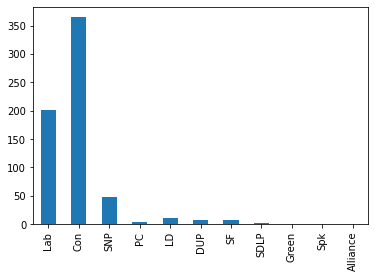

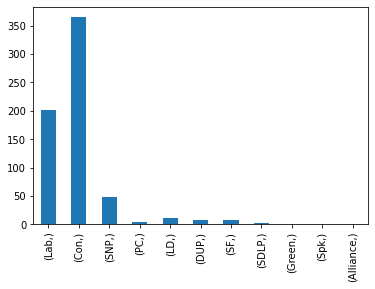

In [101]:
dfdf = pd.DataFrame(partyWinsdf,partiesdf)
dfdf.plot.bar(legend=False)
dfdb = pd.DataFrame(partyWinsdb,partiesdb)
dfdb.plot.bar(legend=False)

In [103]:
election_df.columns

Index(['Unnamed: 0', 'ons_id', 'ons_region_id', 'constituency_name',
       'county_name', 'region_name', 'country_name', 'constituency_type',
       'declaration_time', 'mp_firstname', 'mp_surname', 'mp_gender', 'result',
       'first_party', 'second_party', 'electorate', 'valid_votes',
       'invalid_votes', 'majority', 'con', 'lab', 'ld', 'brexit', 'green',
       'snp', 'pc', 'dup', 'sf', 'sdlp', 'uup', 'alliance', 'other',
       'other_winner'],
      dtype='object')

In [111]:
total_votes=election_df['valid_votes'].sum()
election_df[election_df['first_party']=='Lab']['valid_votes'].sum()
election_df[election_df['first_party']=='Con']['valid_votes'].sum()
print(total_votes)
total_votes_party = [election_df[election_df['first_party']==i]['valid_votes'].sum() for i in partiesdf]
total_votes_party

32014110


[9319588,
 18834650,
 2256143,
 140109,
 566717,
 338968,
 324928,
 94496,
 57998,
 39870,
 40643]

In [110]:
share = [ total_votes_party[i]/total_votes*100 for i in range(0,len(total_votes_party))]
share

[29.11087642292727,
 58.83233986514072,
 7.047339438766219,
 0.43764764973944303,
 1.7702100729959382,
 1.0588081317893892,
 1.0149524693955259,
 0.29516984854490724,
 0.18116386805692863,
 0.12453883615693205,
 0.12695339648673665]